In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Step -1 

The dataset here describes about the details of employess present in a company. Some of the features include<br>
10th score, <br>
inter score, <br>
b.tech score, <br>
specialization in colleges, <br>
tier of college, <br>
score in the aputitude and programming tests.

## Step 2

In [2]:
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

The first column contains onlt train feature. So, better remove the unnamed column

In [4]:
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df.shape

(3998, 38)

In [6]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


# Step - 3 - Univariate Analysis 

In [7]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002093B9A0BE0>,
      dtype=object)

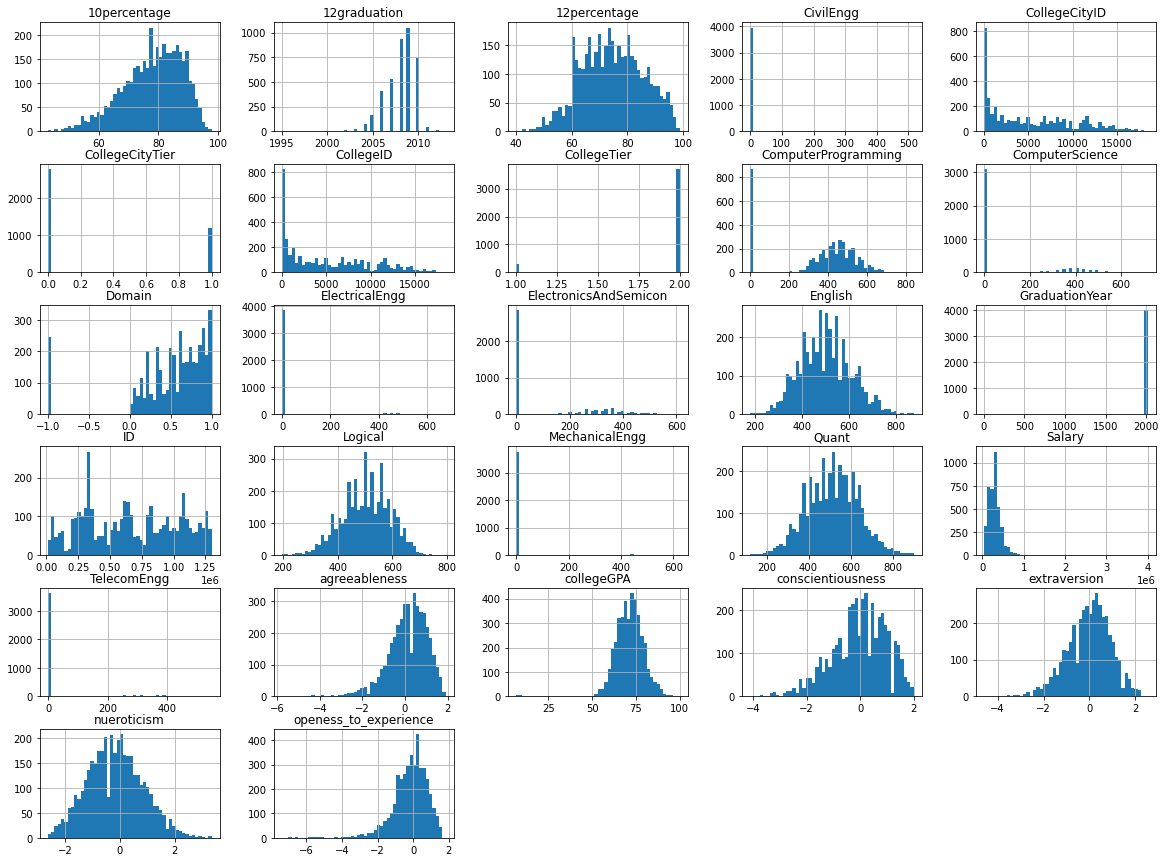

In [8]:
df.hist(bins=50, figsize=(20,15))

### ID column

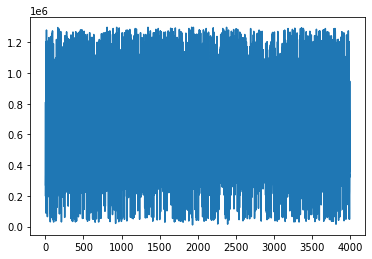

In [9]:
plt.plot(df.ID)

There is not much of analysis to find in here because, the ID is unique to everyone

### Salary Column

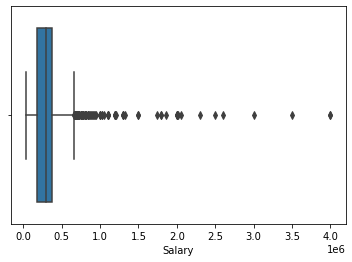

In [10]:
sns.boxplot(x=df.Salary)

we can see that there are a lot of outliers in the data.<br>
we can remove it if needed

In [11]:
df_no_outlier = df[(df.Salary > df.Salary.mean() - 3*df.Salary.std()) & (df.Salary < df.Salary.mean() + 3*df.Salary.std())]

In [12]:
df.shape

(3998, 38)

In [13]:
df_no_outlier.shape

(3958, 38)

we almost are going to loose 40 points if we wanted to remove the outliers. But, it depends on the programmer who is doing the analysis part 

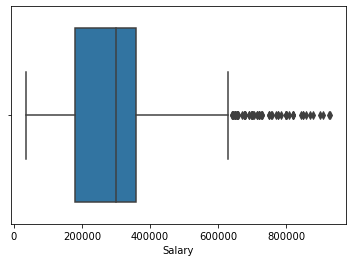

In [14]:
sns.boxplot(x = df_no_outlier.Salary)

There is even some kind of outliers present, we can delete this by adding more standard deviation to our data.<br>
we can observe that more people have an average/ mean income of around 3,00,000 per annum package

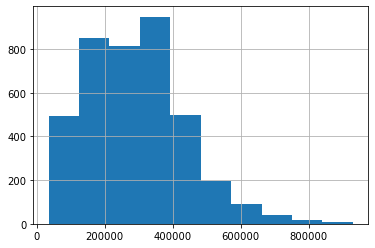

In [15]:
df_no_outlier.Salary.hist()

it's not completely normal but there is some skewness in data and can be removed using boxcoc

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


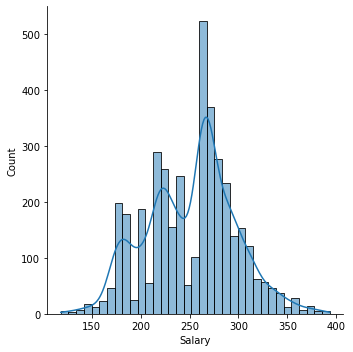

In [16]:
df_no_outlier.Salary = stats.boxcox(df_no_outlier.Salary)[0]
sns.displot(df_no_outlier.Salary,  kde = True)

much better compared to previoulsy skewed data

### DOJ Column

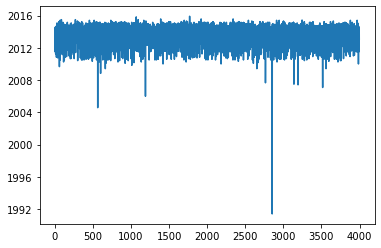

In [17]:
plt.plot(df.DOJ)

In [18]:
df.DOJ.dt.year.value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
1991       1
2008       1
2006       1
2004       1
Name: DOJ, dtype: int64

we can see that only very few people are working in the company from a long time and more are recently joined people

### DOL Column

In [19]:
df.DOL.value_counts().head(15)

present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
2014-04-01 00:00:00      82
2015-02-01 00:00:00      69
2014-06-01 00:00:00      67
2014-09-01 00:00:00      64
2014-08-01 00:00:00      63
2014-12-01 00:00:00      53
2014-07-01 00:00:00      52
2014-05-01 00:00:00      52
2014-02-01 00:00:00      49
2014-01-01 00:00:00      46
Name: DOL, dtype: int64

there a lot of people quitting the company right now<br>
in the same way, many people are joining the company at same time.<br>
something fishy is going on right now 🥴🙄

### Designation column

In [20]:
df.Designation.value_counts().head(20)

software engineer              539
software developer             265
system engineer                205
programmer analyst             139
systems engineer               118
java software engineer         111
software test engineer         100
project engineer                77
technical support engineer      76
senior software engineer        72
java developer                  67
test engineer                   57
web developer                   54
assistant manager               52
application developer           52
network engineer                51
business analyst                49
data analyst                    49
engineer                        47
associate software engineer     46
Name: Designation, dtype: int64

as expected, every company have more software engineers adn software developers 🙂

### Jobcity columns

In [21]:
df.JobCity.value_counts().head(20)

Bangalore        627
-1               461
Noida            368
Hyderabad        335
Pune             290
Chennai          272
Gurgaon          198
New Delhi        196
Mumbai           108
Kolkata           98
Jaipur            46
Lucknow           36
Mysore            36
Navi Mumbai       32
chennai           27
Greater Noida     26
pune              26
Chandigarh        26
Indore            24
Bhubaneswar       22
Name: JobCity, dtype: int64

there are so monay missing cities and it seems that bangalore, noida, hyderabad are tech hubs of india 🖥️

### Gender columns

In [22]:
df.Gender.value_counts()

m    3041
f     957
Name: Gender, dtype: int64

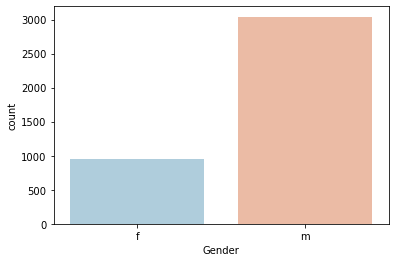

In [23]:
sns.countplot(x='Gender',data=df,palette='RdBu_r')

woah....it looks like there is a huge male domination in the company...🤯<br>
need to use a stratified split while using a machine learning model

### DOB column

In [24]:
df.DOB.dt.year.value_counts()

1991    979
1992    855
1990    774
1989    522
1988    308
1993    299
1987    116
1986     62
1994     31
1985     28
1984     13
1983      4
1982      2
1995      2
1997      1
1977      1
1981      1
Name: DOB, dtype: int64

since this data is basd on 2015,.....2015 - 1991 = 24 years. I think it is quite obvious that more companie have employees beyween age 24-30

### 10percentage column

In [25]:
df['10percentage'].mean()

77.9254427213606

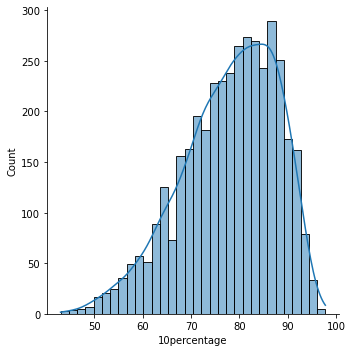

In [26]:
sns.displot(df['10percentage'],  kde = True)

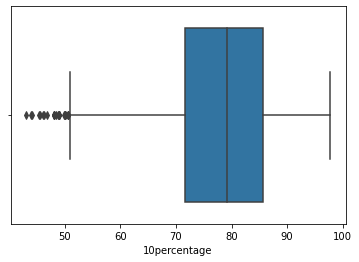

In [27]:
sns.boxplot(x=df['10percentage'])

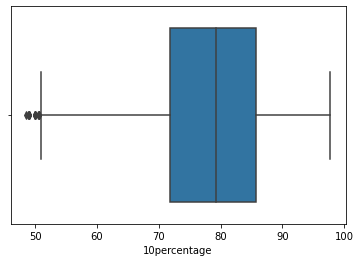

In [28]:
df_no_outlier = df[(df['10percentage'] > df['10percentage'].mean() - 3*df['10percentage'].std()) &
                   (df['10percentage'] < df['10percentage'].mean() + 3*df['10percentage'].std())]
sns.boxplot(x = df_no_outlier['10percentage'])

### 10board columns

In [29]:
df['10board'].value_counts()

cbse                                                            1395
state board                                                     1164
0                                                                350
icse                                                             281
ssc                                                              122
                                                                ... 
msbshse,pune                                                       1
nagpur board,nagpur                                                1
board of high school and intermediate education uttarpradesh       1
upbhsie                                                            1
apsche                                                             1
Name: 10board, Length: 275, dtype: int64

never taught CBSE is on top 😲...always taught state board is more popular...great to see CBSE in top

### 12graduation column

In [30]:
df['12graduation'].value_counts()

2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
2013       1
1999       1
1995       1
1998       1
Name: 12graduation, dtype: int64

obvious like the DOB column

### 12percentage column

In [31]:
df['12percentage'].mean()

74.46636568284127

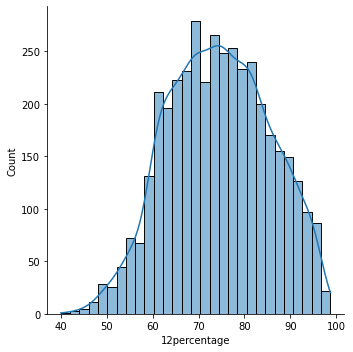

In [32]:
sns.displot(x = df['12percentage'], kde = True)

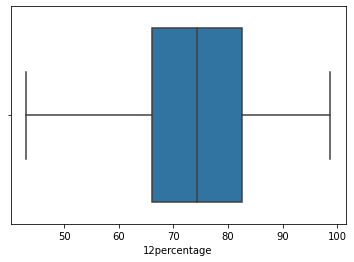

In [33]:
df_no_outlier = df[(df['12percentage'] > df['12percentage'].mean() - 3*df['12percentage'].std()) &
                   (df['12percentage'] < df['12percentage'].mean() + 3*df['12percentage'].std())]
sns.boxplot(x = df_no_outlier['12percentage'])

no outliers at all after removing them

### 12board column

In [34]:
df['12board'].value_counts()

cbse                                                 1400
state board                                          1254
0                                                     359
icse                                                  129
up board                                               87
                                                     ... 
up bourd                                                1
board fo intermediate education, ap                     1
jstb,jharkhand                                          1
department of pre-university eduction                   1
department of pre-university education, bangalore       1
Name: 12board, Length: 340, dtype: int64

yahoooooo.....CBSE is leading again 

### CollegeID column

In [35]:
df.CollegeID.value_counts()

272      94
64       38
11759    35
44       35
47       33
         ..
5653      1
7547      1
13209     1
15735     1
6143      1
Name: CollegeID, Length: 1350, dtype: int64

seems that the company is a mass recuiter from some of the colleges

### collegeGPA column

In [36]:
df.collegeGPA.mean()

71.48617058529268

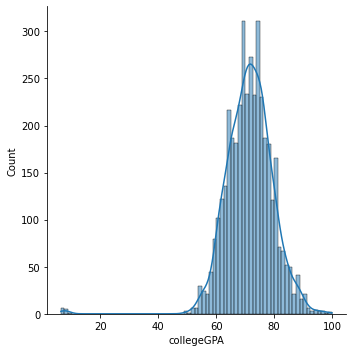

In [37]:
sns.displot(x = df['collegeGPA'], kde = True)

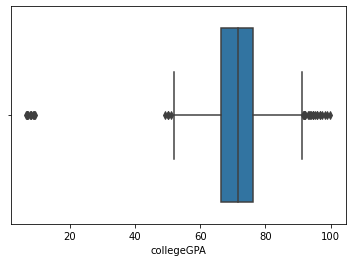

In [38]:
sns.boxplot(x = df['collegeGPA'])

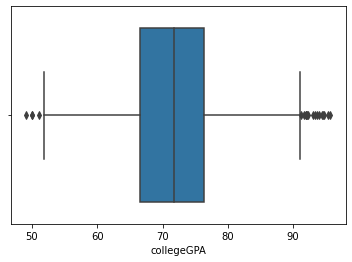

In [39]:
df_no_outlier = df[(df['collegeGPA'] > df['collegeGPA'].mean() - 3*df['collegeGPA'].std()) &
                   (df['collegeGPA'] < df['collegeGPA'].mean() + 3*df['collegeGPA'].std())]
sns.boxplot(x = df_no_outlier['collegeGPA'])

the distplot have more outliers....may be we need to look more about it

### Other columns

it seems like there is not heavy relation with respect to other columns.<br>
beacause these jobs are more realted to softare and more people will be realte to computer sciene and IT students.<br>
So, i have not visualized remaining graphs.

# Step - 4 - Bivariate Analysis

In [40]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209407EBBB0>,
      dtype=object)

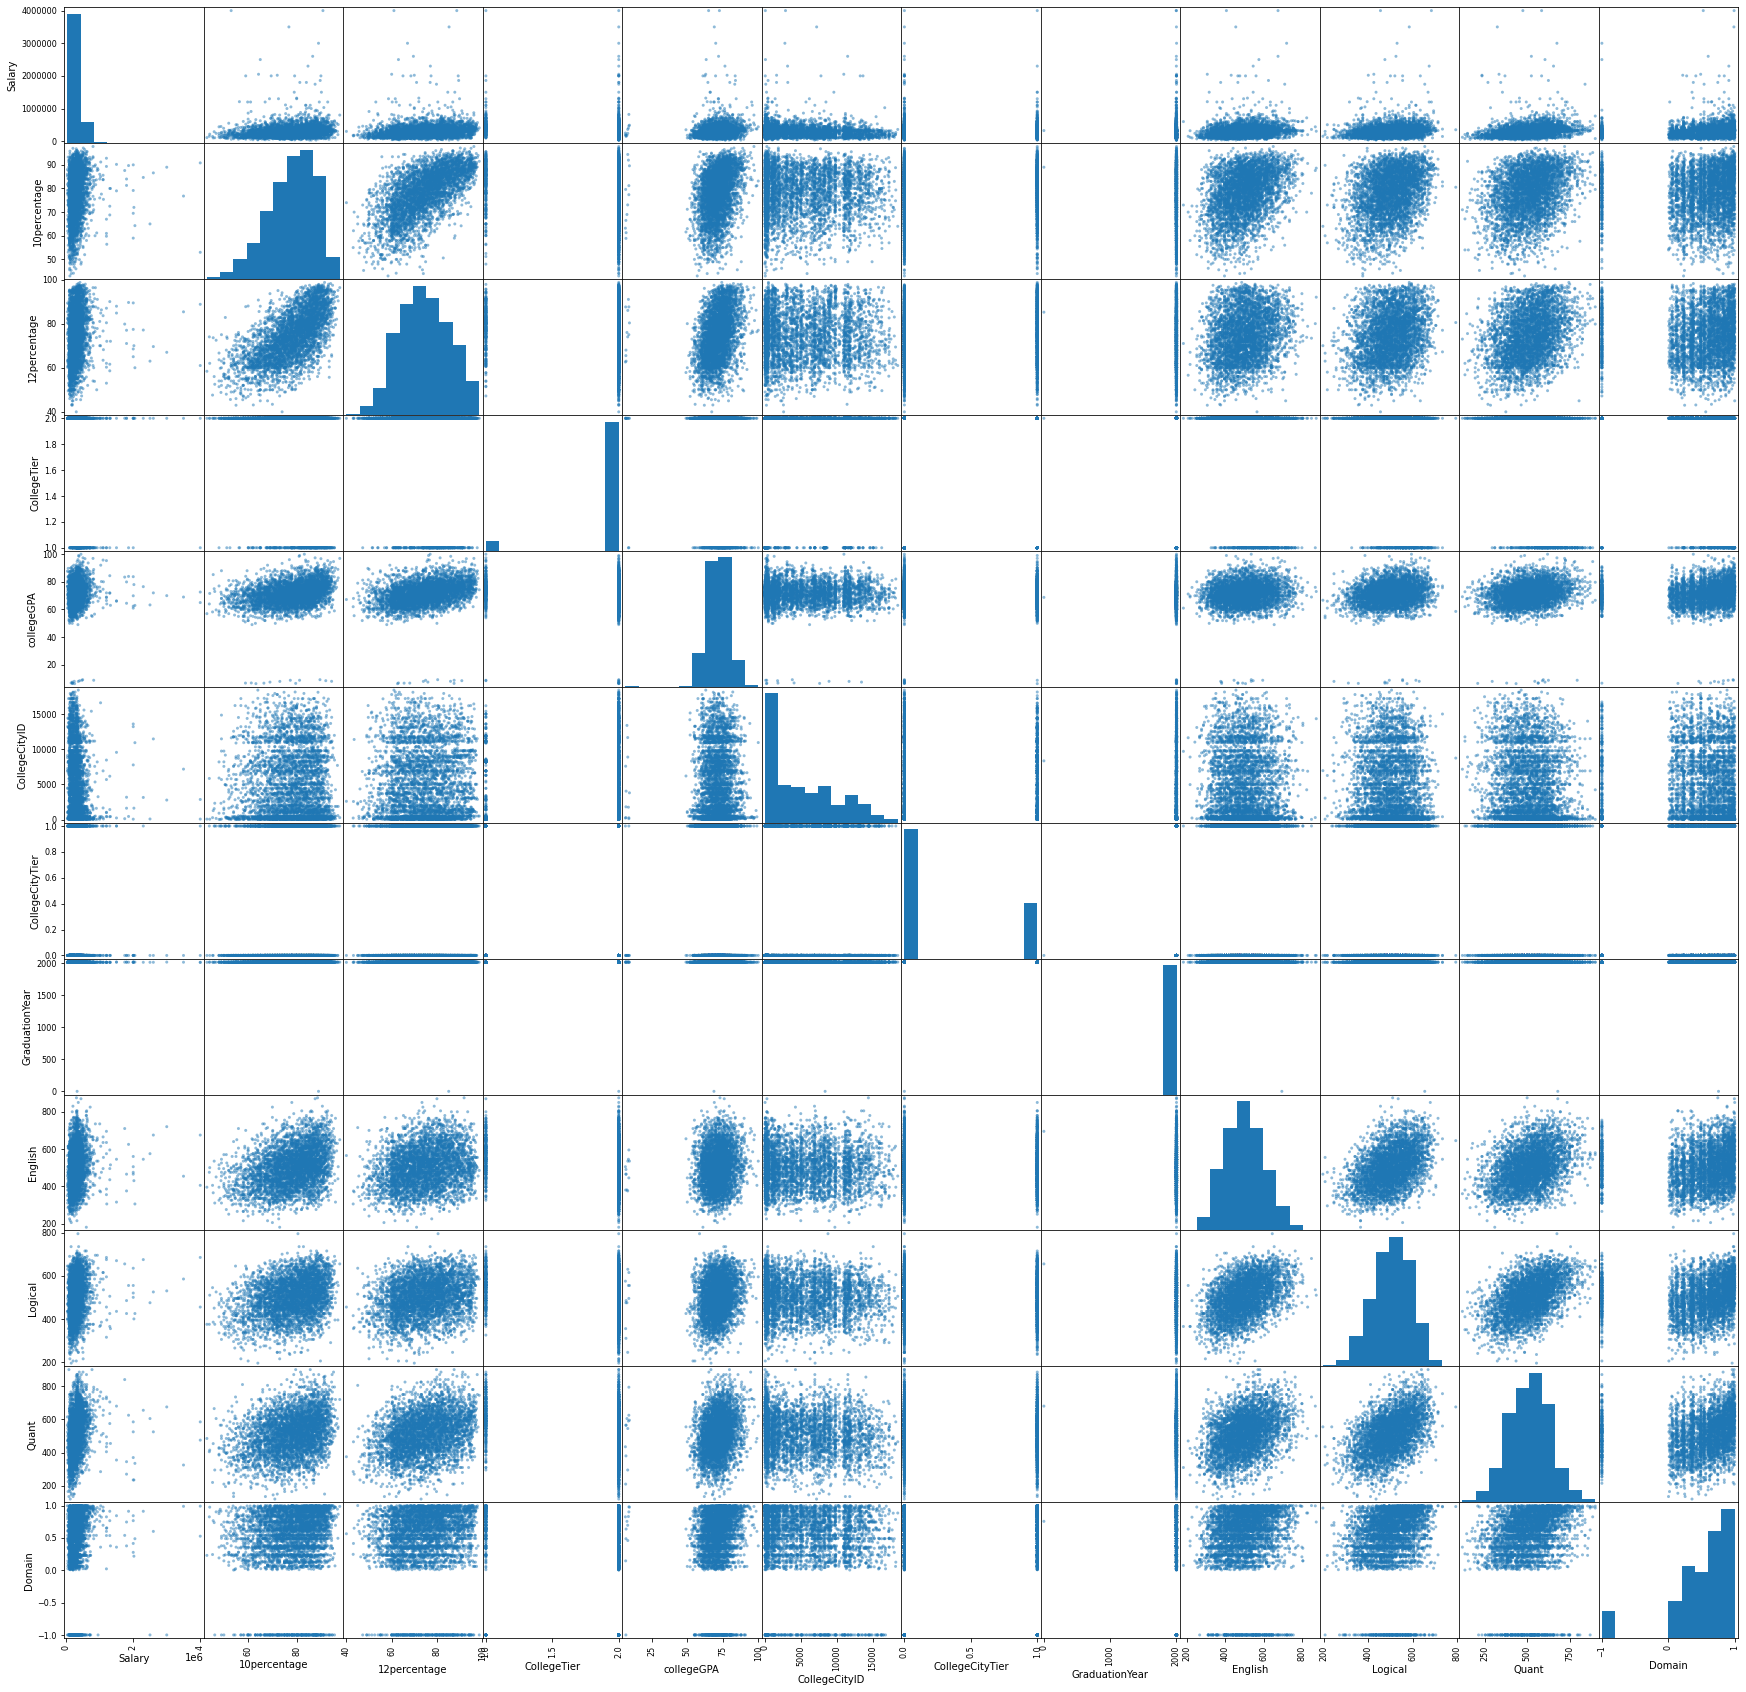

In [41]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ['Salary', 'Designation', 'JobCity', 'Gender', 
       '10percentage',  '12percentage', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain']
scatter_matrix(df[attributes], figsize=(30, 30))

we can see that there is a positive correlation between many columns that are present in our datset.

## Step - 5 - Research Questions<br>

-> Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.<br>
-> Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)


In [42]:
d1 = df[df['Designation'] == 'programmer analyst']
d2 = df[(df['Designation'] == 'software engineer')]
d3 = df[(df['Designation'] == 'hardware engineer')]
d4 = df[(df['Designation'] == 'associate engineer')]

frames = [d1, d2, d3, d4]

result = pd.concat(frames)
result.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
24,963123,335000,2014-06-01,2015-06-01 00:00:00,programmer analyst,Hyderabad,m,1993-06-28,88.0,state board,...,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.9950,-0.6692
44,247617,380000,2012-05-01,2015-04-01 00:00:00,programmer analyst,Bangalore,f,1989-01-06,84.5,0,...,-1,-1,-1,-1,-1,0.5100,0.6568,-0.6343,0.2973,0.1864
75,1067148,300000,2014-09-01,present,programmer analyst,Bangalore,m,1992-09-03,70.6,cbse,...,-1,-1,-1,-1,-1,0.5591,0.2124,-1.2196,-0.7415,-0.8608
114,50876,640000,2010-04-01,present,programmer analyst,Bangalore,m,1987-04-24,78.0,0,...,-1,-1,-1,-1,-1,-0.2628,-0.5913,0.2366,-0.1727,0.8183
124,614524,315000,2014-11-01,present,programmer analyst,-1,f,1991-02-06,82.3,cbse,...,-1,-1,393,-1,-1,-0.1590,-1.1196,1.2396,1.6672,0.6721


In [43]:
result.Designation.value_counts()

software engineer     539
programmer analyst    139
hardware engineer       8
associate engineer      6
Name: Designation, dtype: int64

In [44]:
result.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [45]:
result['Salary'].min()

60000

In [46]:
result['Salary'].max()

1500000

In [47]:
result['Salary'].mean()

339790.4624277457

So, we can say that on an average a person can earn upto 340000 per year

###### we can even tune this up for just the people who graduate in 2014, considering that is the salary that is offered for a fresh graduate

In [48]:
result.GraduationYear.value_counts()

2013    233
2014    167
2012    137
2011     89
2010     40
2015     16
2009      6
2016      3
2007      1
Name: GraduationYear, dtype: int64

In [49]:
result2 = result[result['GraduationYear'] == 2014]
print(result2['Salary'].min(), 'is min')
print(result2['Salary'].max(), 'is max')
print(result2['Salary'].mean(), 'is mean')

85000 is min
820000 is max
323203.5928143713 is mean


even in this case also, we can say that on an average a fresher gets more than 3,00,000

In [50]:
corr_matrix = result.corr()
corr_matrix

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,1.000000,-0.207117,0.026858,0.679950,0.018013,0.265956,-0.012301,0.089656,0.265956,-0.056595,...,0.507385,-0.008107,0.087119,-0.017109,-0.014963,0.143807,0.024013,0.131899,-0.136984,0.030727
Salary,-0.207117,1.000000,0.240110,-0.097383,0.184460,-0.175118,-0.246266,0.130709,-0.175118,0.049819,...,-0.083275,0.001240,-0.010199,-0.034754,-0.032531,-0.082105,0.060150,0.041237,-0.043576,-0.011612
10percentage,0.026858,0.240110,1.000000,0.246477,0.654091,-0.018953,-0.094679,0.244366,-0.018953,0.095792,...,-0.067910,0.030035,0.065970,0.102113,-0.002679,0.034765,0.118281,-0.053943,-0.050937,0.031383
12graduation,0.679950,-0.097383,0.246477,1.000000,0.309756,0.232801,-0.014658,0.088756,0.232801,0.013463,...,0.348715,-0.104852,0.099867,0.085546,-0.178137,0.062220,0.023939,0.063432,-0.056829,-0.033617
12percentage,0.018013,0.184460,0.654091,0.309756,1.000000,0.048626,-0.067332,0.233996,0.048626,0.107485,...,-0.074226,-0.002244,0.073461,0.072475,-0.030817,-0.027408,0.060528,-0.049867,-0.025780,-0.062111
CollegeID,0.265956,-0.175118,-0.018953,0.232801,0.048626,1.000000,0.070382,0.079898,1.000000,0.034021,...,0.140631,-0.017608,-0.033065,-0.001379,-0.015014,0.049439,-0.015606,-0.017488,-0.066103,-0.005353
CollegeTier,-0.012301,-0.246266,-0.094679,-0.014658,-0.067332,0.070382,1.000000,-0.010921,0.070382,-0.121652,...,-0.022218,0.030364,0.005504,0.037965,0.022931,0.091725,-0.014333,0.048205,-0.027755,-0.008975
collegeGPA,0.089656,0.130709,0.244366,0.088756,0.233996,0.079898,-0.010921,1.000000,0.079898,-0.023430,...,0.012995,-0.010905,0.055532,0.002105,-0.027759,0.022686,0.099149,-0.013387,-0.053236,-0.016725
CollegeCityID,0.265956,-0.175118,-0.018953,0.232801,0.048626,1.000000,0.070382,0.079898,1.000000,0.034021,...,0.140631,-0.017608,-0.033065,-0.001379,-0.015014,0.049439,-0.015606,-0.017488,-0.066103,-0.005353
CollegeCityTier,-0.056595,0.049819,0.095792,0.013463,0.107485,0.034021,-0.121652,-0.023430,0.034021,1.000000,...,-0.022057,0.016561,-0.017809,0.030469,0.015215,-0.016047,-0.026982,-0.067323,0.006058,-0.029429


There is no correlation between Specialization and gender as we can see in the above chart.

### Step -6

This is an old data and more data can help to understand more cearly.

finally, we can conclude that the relations between years of experience and the experience in a particular company can help in high salary of a person

### Step - 7

In [51]:
a = df.columns
for i in a:
    if len(df[i].value_counts()) == 2:
        print(i, len(df[i].value_counts()))

Gender 2
CollegeTier 2
CollegeCityTier 2


In [52]:
result['Gender'].head()

24     m
44     f
75     m
114    m
124    f
Name: Gender, dtype: object

In [53]:
result['CollegeTier'].head()

24     2
44     2
75     2
114    2
124    2
Name: CollegeTier, dtype: int64

In [54]:
result['CollegeCityTier'].head()

24     1
44     0
75     1
114    0
124    0
Name: CollegeCityTier, dtype: int64

since, only gender is in cateogorical varibles, we only use ordinal encoding for Gender

In [55]:
from sklearn.preprocessing import OrdinalEncoder
en = OrdinalEncoder()
en.fit(result[['Gender']])
result

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
24,963123,335000,2014-06-01,2015-06-01 00:00:00,programmer analyst,Hyderabad,m,1993-06-28,88.00,state board,...,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.9950,-0.6692
44,247617,380000,2012-05-01,2015-04-01 00:00:00,programmer analyst,Bangalore,f,1989-01-06,84.50,0,...,-1,-1,-1,-1,-1,0.5100,0.6568,-0.6343,0.2973,0.1864
75,1067148,300000,2014-09-01,present,programmer analyst,Bangalore,m,1992-09-03,70.60,cbse,...,-1,-1,-1,-1,-1,0.5591,0.2124,-1.2196,-0.7415,-0.8608
114,50876,640000,2010-04-01,present,programmer analyst,Bangalore,m,1987-04-24,78.00,0,...,-1,-1,-1,-1,-1,-0.2628,-0.5913,0.2366,-0.1727,0.8183
124,614524,315000,2014-11-01,present,programmer analyst,-1,f,1991-02-06,82.30,cbse,...,-1,-1,393,-1,-1,-0.1590,-1.1196,1.2396,1.6672,0.6721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,625251,515000,2013-09-01,present,associate engineer,Hyderabad,m,1992-02-26,84.80,cbse,...,-1,-1,-1,-1,-1,-0.4463,-0.2871,0.9322,-0.6147,-0.6692
819,1068402,350000,2014-04-01,present,associate engineer,Bangalore,m,1993-06-16,74.83,state board,...,407,-1,-1,-1,-1,0.2718,-0.7866,1.7007,-0.6147,0.8637
2563,1085682,80000,2013-02-01,2015-03-01 00:00:00,associate engineer,Ghaziabad,m,1990-10-28,51.60,up board,...,438,-1,-1,-1,-1,-1.8825,0.3789,0.4711,0.7798,-0.4776
3134,831825,315000,2015-03-01,present,associate engineer,Chennai,m,1992-09-02,73.40,state board,...,376,-1,-1,-1,-1,-0.5899,-1.6191,-0.7585,-0.4879,-3.3518


using dummies to tranform remaining

In [56]:
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
result = pd.get_dummies(result, columns=one_hot_encode_cols, drop_first=True)
result

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,CollegeState_Maharashtra,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
24,963123,335000,2014-06-01,1993-06-28,88.00,2010,90.00,9173,2,76.00,...,0,0,0,0,0,1,0,0,0,0
44,247617,380000,2012-05-01,1989-01-06,84.50,2007,82.50,3461,2,92.10,...,0,0,0,0,0,0,0,0,0,0
75,1067148,300000,2014-09-01,1992-09-03,70.60,2010,78.67,182,2,75.84,...,0,0,0,0,0,0,0,0,0,0
114,50876,640000,2010-04-01,1987-04-24,78.00,2004,71.30,5400,2,67.00,...,0,0,0,0,0,0,0,0,0,0
124,614524,315000,2014-11-01,1991-02-06,82.30,2010,89.60,272,2,67.95,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,625251,515000,2013-09-01,1992-02-26,84.80,2009,87.40,9019,2,76.60,...,0,0,0,0,0,0,0,0,0,0
819,1068402,350000,2014-04-01,1993-06-16,74.83,2010,87.40,15456,2,69.31,...,0,0,0,0,0,0,0,0,0,0
2563,1085682,80000,2013-02-01,1990-10-28,51.60,2007,52.00,140,2,74.00,...,0,0,0,0,0,0,0,1,0,0
3134,831825,315000,2015-03-01,1992-09-02,73.40,2010,74.40,492,2,61.20,...,0,0,0,0,0,1,0,0,0,0


Now, we can standardize the data using standard scaler

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(result)
scaled_data

TypeError: invalid type promotion